In [ ]:
# Scenario Question 💼
# A telecommunications company has collected data on 500 customers, including their monthly bill
# amount, average call duration, internet usage, and number of support calls. The company wants
# to group customers into meaningful segments to design targeted marketing campaigns and improve customer
#  service.
# You are tasked with:
# - Using K‑Means clustering to explore possible customer segments.
# - Applying the Elbow Method to determine where adding more clusters stops giving significant improvement.
# - Using the Silhouette Score to validate which number of clusters produces the most well‑separated
# and meaningful groups.


# Scenario Question 💼
# A telecommunications company has collected data on 500 customers, including their monthly bill amount, average call duration, internet usage, and number of support calls. The company wants to group customers into meaningful segments to design targeted marketing campaigns and improve customer service.
# You are tasked with:
# - Using K‑Means clustering to explore possible customer segments.
# - Applying the Elbow Method to determine where adding more clusters stops giving significant improvement.
# - Using the Silhouette Score to validate which number of clusters produces the most well‑separated and meaningful groups

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
# Step 2: Create synthetic telecom customer dataset
# (in practice, replace with actual enterprise customer data)
data = {
    'CustomerID': range(1, 501),
    'MonthlyBill': np.random.randint(20, 200, 500),       # monthly bill in $
    'CallDuration': np.random.randint(50, 500, 500),      # avg monthly call minutes
    'InternetUsage': np.random.randint(10, 300, 500),     # GB per month
    'SupportCalls': np.random.randint(0, 10, 500)         # number of support calls
}
df = pd.DataFrame(data)

In [6]:
X=df.drop('CustomerID',axis=1)

In [7]:
#Scale Features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

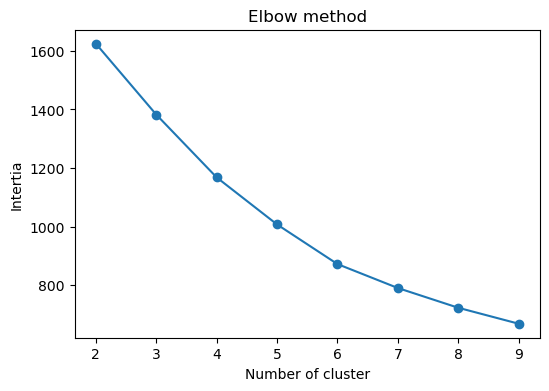

In [19]:
#Elbow mehtod 
inertia=[]
k_range=range(2,10)

for k in k_range:
    Kmeans=KMeans(n_clusters=k,random_state=42)
    Kmeans.fit(X_scaled)
    inertia.append(Kmeans.inertia_)
plt.figure(figsize=(6,4))
plt.plot(k_range,inertia,marker='o')
plt.title('Elbow method -Telecom Customer')
plt.xlabel('Number of cluster')
plt.ylabel('Intertia')
plt.title('Elbow method')
plt.show()

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

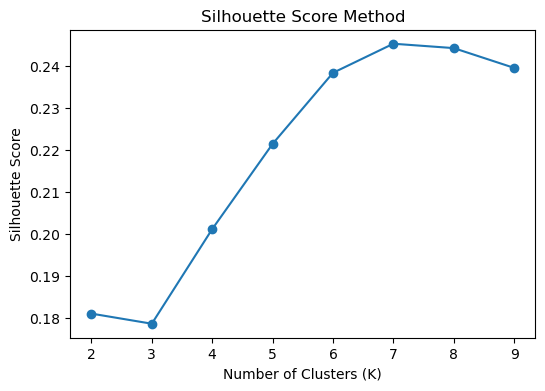

Best K based on Silhouette Score: 7
Best Silhouette Score: 0.24534262192314085


In [23]:
from sklearn.metrics import silhouette_score


sil_scores = []
k_range_sil = range(2, 10)

for k in k_range_sil:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

# Plot
plt.figure(figsize=(6,4))
plt.plot(k_range_sil, sil_scores,marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Method")
plt.show()

# Find best K
best_score = max(sil_scores)
best_k = k_range_sil[sil_scores.index(best_score)]

print("Best K based on Silhouette Score:", best_k)
print("Best Silhouette Score:", best_score)